# Samurai by the numbers (lvl 50)
## by Tzuyu Chou (Cactuar)

### Update log
<ul>
<li> 06/05/2017: Finished through two extended rotations.
<li> 06/03/2017: Updating format to be consistent with part 1. Including the new parse rotation function syntax.
<li> 06/01/2017: Three openers and priority
</ul>

In [102]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

<hr width=75%>

## lvl 50

Level 50 unlocks the final weaponskill, Yukikaze, a combo finisher to open the final Sen, Setsu. It combos from Hakaze so it is a two hit combo contrary to Gekko and Kasha. Level 50 also confers the Meikyo Shisui ability, a cooldown that allows you to execute up to 3 combo abilities without meeting combo prerequisites. This may be used, for example, to quickly get Jinpu and Shifu buffs up or to open up all three Sen in a fraction of the time as normal.

Furthermore, the opening of the final Sen unlocks the final Iaijutsu, Midare Setsugekka. This powerful single target nuke gives the opportunity in single target situations to deal massive damage without having to clip Higanbana.

Let's explore opener options.

## Opener 1
Buff first: Shifu > Jinpu > Yukikaze.

Iaijutsu: Higanbana > Midare Setsugekka. 

Meikyo Shisui: generate second Midare Setsugekka. 

In [103]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Higanbana'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Midare Setsugekka', 'Meikyo Shisui'), ('Kasha'), ('Gekko'), ('Yukikaze'), 
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu')]

In [104]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 415.50057894736835
average potency per second = 191.242999031


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.000,150.000
1,2.40,Shifu,,280.000,430.000
2,4.56,Kasha,,400.000,830.000
3,6.72,Hakaze,,150.000,980.000
4,8.88,Jinpu,,280.000,1260.000
5,11.04,Higanbana,,276.000,1536.000
6,13.20,Gekko,,493.327,2029.327
7,15.36,Hakaze,,205.827,2235.154
8,17.52,Yukikaze,,424.327,2659.481
9,19.68,Hakaze,,224.802,2884.283


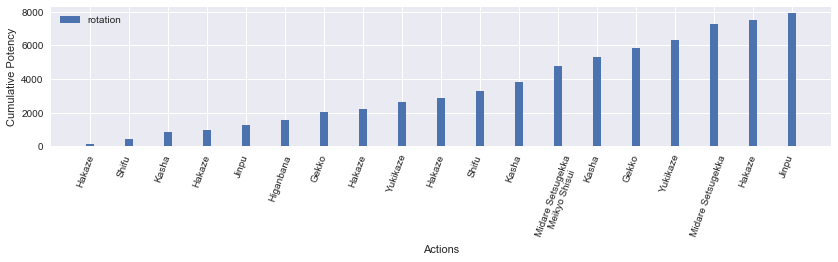

In [105]:
plot_potency(df0)

## Opener 2
Similar to Opener 1, just prioritize Jinpu > Shifu > Yukikaze so that the Higanbana DoT is buffed earlier.

In [106]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Yukikaze'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Midare Setsugekka', 'Meikyo Shisui'), ('Kasha'), ('Gekko'), ('Yukikaze'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu')]

In [107]:
df1, average_potency, pps = sam.parse_rotation(actions)
display(df1)

average potency per GCD = 425.9511052631579
average potency per second = 191.597324811


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.000,150.000
1,2.40,Jinpu,,280.000,430.000
2,4.80,Gekko,,460.000,890.000
3,7.20,Higanbana,,276.000,1166.000
4,9.60,Hakaze,,209.530,1375.530
5,12.00,Shifu,,359.030,1734.560
6,14.16,Kasha,,493.327,2227.887
7,16.32,Hakaze,,205.827,2433.714
8,18.48,Yukikaze,,424.327,2858.041
9,20.64,Hakaze,,224.802,3082.843


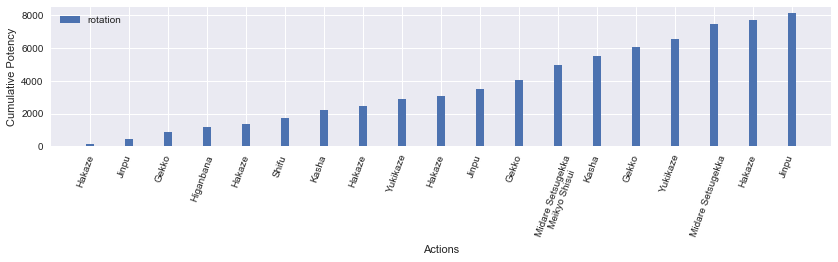

In [108]:
plot_potency(df1)

## Opener 3
Meikyo Shisui: Get buffs up ASAP. Since Iaijutsu consumes one charge of Meikyo Shisui, we must delay Higanbana.

Buffs first: Shifu > Jinpu > Yukikaze.

Iaijutsu: Midare Setsugekka > Higanbana.

In [109]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha', 'Meikyo Shisui'),
           ('Jinpu'), ('Gekko'), ('Yukikaze'), ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze'), ('Higanbana'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze'), ('Midare Setsugekka')]

In [110]:
df2, average_potency, pps = sam.parse_rotation(actions)
display(df2)

average potency per GCD = 410.96930157894735
average potency per second = 189.157382025


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.00000,150.00000
1,2.40,Shifu,,280.00000,430.00000
2,4.56,Kasha,Meikyo Shisui,400.00000,830.00000
3,6.72,Jinpu,,280.00000,1110.00000
4,8.88,Gekko,,460.00000,1570.00000
5,11.04,Yukikaze,,391.00000,1961.00000
6,13.20,Midare Setsugekka,,919.08000,2880.08000
7,15.36,Hakaze,,191.47500,3071.55500
8,17.52,Yukikaze,,434.01000,3505.56500
9,19.68,Higanbana,,306.36000,3811.92500


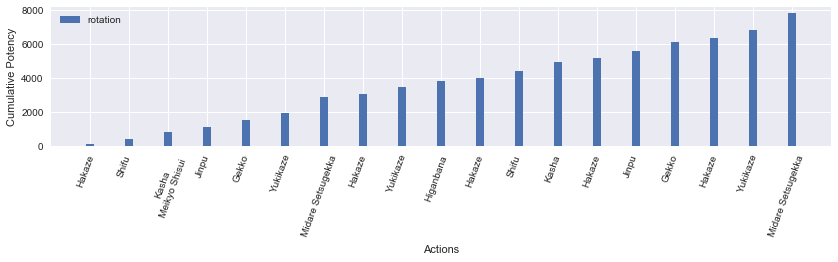

In [111]:
plot_potency(df2)

## Opener 4
Buffs up first: Shifu > Jinpu > Yukikaze

Iaijutsu: Midare Setsugekka > Higanbana

Meikyo Shisui: Generate second Midare Setsugekka

In [112]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Higanbana', 'Meikyo Shisui'), ('Kasha'), ('Gekko'), ('Yukikaze'),
           ('Midare Setsugekka'), ('Hakaze'), ('Jinpu')]

In [113]:
df3, average_potency, pps = sam.parse_rotation(actions)
display(df3)

average potency per GCD = 405.97777999999994
average potency per second = 186.85992781


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.00000,150.00000
1,2.40,Shifu,,280.00000,430.00000
2,4.56,Kasha,,400.00000,830.00000
3,6.72,Hakaze,,150.00000,980.00000
4,8.88,Jinpu,,280.00000,1260.00000
5,11.04,Gekko,,460.00000,1720.00000
6,13.20,Hakaze,,172.50000,1892.50000
7,15.36,Yukikaze,,391.00000,2283.50000
8,17.52,Midare Setsugekka,,919.08000,3202.58000
9,19.68,Hakaze,,191.47500,3394.05500


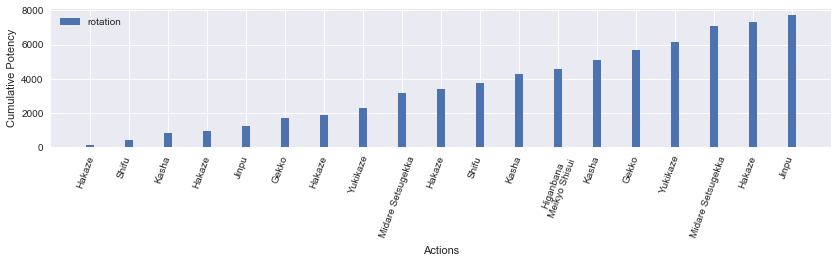

In [114]:
plot_potency(df3)

## Opener 5
Similar to Openers 1 and 2, but prioritizes Yukikaze > Shifu > Jinpu. This lets you put Higanbana one GCD earlier and, for parties without WAR, gets the slashing resistance down debuff up faster. A NIN may possibly get it up faster or at the same time if it opens with Shadow Fang combo due to Huton.

In [115]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Yukikaze'), ('Higanbana'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze'), ('Midare Setsugekka', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko'), ('Yukikaze'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha')]

In [116]:
df4, average_potency, pps = sam.parse_rotation(actions)
display(df4)

average potency per GCD = 428.8456631578947
average potency per second = 194.001609524


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.0000,150.0000
1,2.40,Yukikaze,,340.0000,490.0000
2,4.80,Higanbana,,266.4000,756.4000
3,7.20,Hakaze,,197.5800,953.9800
4,9.60,Shifu,,341.8800,1295.8600
5,11.76,Kasha,,471.9720,1767.8320
6,13.92,Hakaze,,194.4720,1962.3040
7,16.08,Jinpu,,342.9678,2305.2718
8,18.24,Gekko,,542.7678,2848.0396
9,20.40,Hakaze,,223.6428,3071.6824


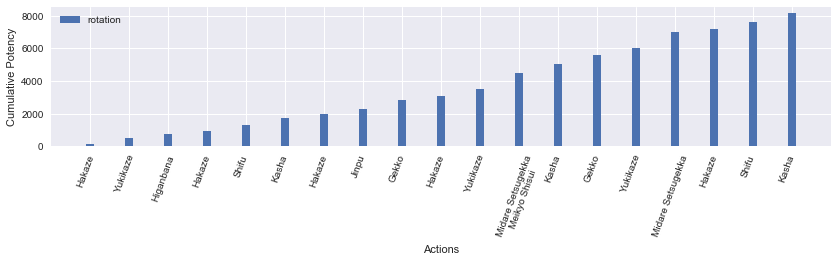

In [117]:
plot_potency(df4)

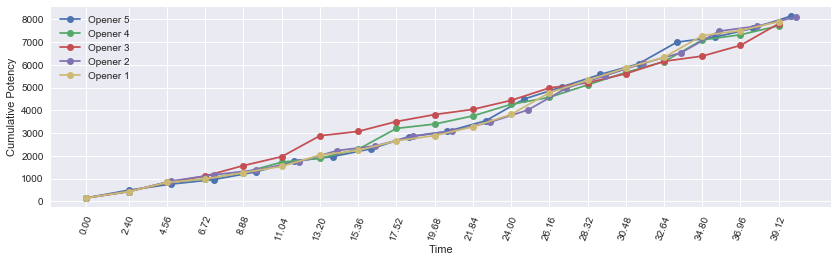

In [118]:
dfs = [df4, df3, df2, df1, df0]
labels = ['Opener 5', 'Opener 4', 'Opener 3', 'Opener 2', 'Opener 1']
compare_n_potencies(dfs, labels)

The time horizon was selected so that each opener had at least two Midare Setsugekka.

These openers have fairly similar cumulative potencies over the selected time horizon. At level 50, you have no other offensive cooldowns when considering buff alignment. Party synergies will need to be considered to determine the best placement. (Maximizing potency delivered under party buffs.) Higanbana is applied at a different time and each opener bursts at different times. Since Higanbana and Midare Setsugekka have the highest effective potency per GCD (with DoT snapshot), getting those Iaijutsu under party buffs will differentiate these openers' potency significantly.

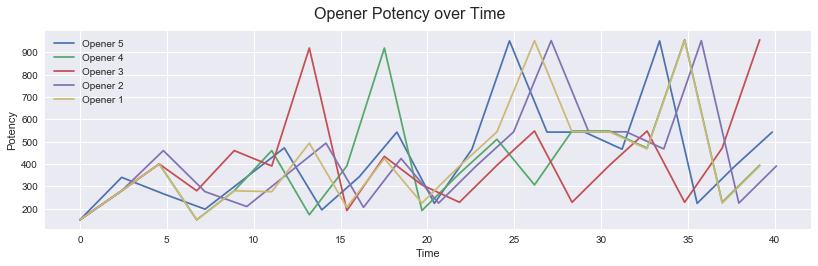

In [119]:
fig, ax = plt.subplots(figsize=(12, 4))

for k, df in enumerate(dfs):
    ax.plot(df['Time'], df['Potency'], label=labels[k])
    ax.set_xlabel('Time')
    ax.set_ylabel('Potency')
    ax.legend(loc='upper left', framealpha=0.5)

fig.suptitle('Opener Potency over Time')
fig.tight_layout(pad=3)

### Priority: Shifu > Jinpu > Yukikaze and Higanbana > Midare Setsugekka
Since Yukikaze is applied to the target, refreshing it on a dying target is lesser of a priority. However, since it is necessary to open Setsu, it cannot be neglected.

### Filler: Combos to refresh buffs, avoid wasting Sen.

### AoE: Similar as lvl 40-49... avoid using Yukikaze in large pulls due to it being a target debuff, not a self buff.
You will probably be using the AoE weaponskills -> Tenka Goken rotation anyway.

## Extended simulations

Openers are fine to look at it in a vacuum, but cooldown and buff alignment is difficult to see over short time horizons; do the buff/cooldown timings set you up nicely for the rest of the encounter? Let's look at how these openers transition into the priority system and look at an example of how a long single target encounter may go.

### With Opener 5
This opener had the highest average potency by a slim margin.

In [120]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Yukikaze'), ('Higanbana'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze'), ('Midare Setsugekka', 'Meikyo Shisui'),
           ('Kasha'), ('Gekko'), ('Yukikaze'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'), 
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Higanbana'), ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Midare Setsugekka'), ('Hakaze'), # Meikyo Shisui should be coming off c/d next.
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Midare Setsugekka'), # Higanbana DoT should be falling off...
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Higanbana', 'Meikyo Shisui'),
           ('Yukikaze'), ('Kasha'), ('Gekko'), ('Midare Setsugekka')]

In [121]:
df4_ext, average_potency, pps = sam.parse_rotation(actions)
display(df4_ext)

average potency per GCD = 444.76913359375044
average potency per second = 204.491555675


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.00000,150.00000
1,2.40,Yukikaze,,340.00000,490.00000
2,4.80,Higanbana,,266.40000,756.40000
3,7.20,Hakaze,,197.58000,953.98000
4,9.60,Shifu,,341.88000,1295.86000
5,11.76,Kasha,,471.97200,1767.83200
6,13.92,Hakaze,,194.47200,1962.30400
7,16.08,Jinpu,,342.96780,2305.27180
8,18.24,Gekko,,542.76780,2848.03960
9,20.40,Hakaze,,223.64280,3071.68240


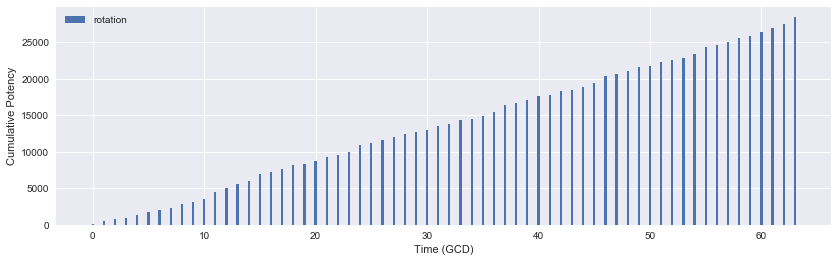

In [122]:
plot_potency(df4_ext, truncate_actions=True)

Interestingly enough, the average potency this long into the encounter is actually higher than after the opener. This can be attributed to the lack of stacking damage buffs that we can blow into the opener. 

One observed issue through this simulation is the timing of Higanbana's DoT and Meikyo Shisui coming off cooldown. As commented in the actions list, Meikyo Shisui comes off cooldown for quite a while before an optimal time to use it is presented. It should be off cooldown at around index 48; this is right before a Sen is opened via combo finisher. With the MO of using Meikyo Shisui exclusively to open three Sen in a row, this means we must wait until after we naturally open these Sen (at index 54). Furthermore, the third Higanbana is due to be applied at approximately index 55. Since this is when Midare Setsugekka is ready, we must delay. At this juncture, we must decide if we let Higanbana's DoT fall off for four more GCDs (about 3-4 ticks) in order to to get Meikyo Shisui back on cooldown after a double Midare Setsugekka. The other option would be to get Higanbana applied ASAP. 

The usual answer for this dilemma is constrained by the number of Meikyo Shisui uses available in the encounter. If delaying using Meikyo Shisui too long results in one less use of it, then we should lean towards letting Higanbana drop a few ticks if it lets us use Meikyo Shisui sooner.

### With Opener 3
This opener had the lowest average potency, but got buffs up faster and got Meikyo Shisui on cooldown the soonest. This difference in buff/DoT timing is worth exploring

In [123]:
sam = Samurai()

n_targets = 1

actions = [('Hakaze'), ('Shifu'), ('Kasha', 'Meikyo Shisui'),
           ('Jinpu'), ('Gekko'), ('Yukikaze'), ('Midare Setsugekka'),
           ('Hakaze'), ('Yukikaze'), ('Higanbana'), ('Hakaze'),
           ('Shifu'), ('Kasha'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Yukikaze'), ('Midare Setsugekka'),
           ('Hakaze'), ('Shifu'), ('Kasha'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Yukikaze'),
           ('Midare Setsugekka'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko'), ('Hakaze'),
           ('Yukikaze'), ('Midare Setsugekka'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Higanbana', 'Meikyo Shisui'), ('Gekko'), ('Yukikaze'),
           ('Kasha'), ('Midare Setsugekka'), ('Hakaze'), ('Jinpu'),
           ('Gekko'), ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze'), ('Midare Setsugekka'), ('Hakaze'),
           ('Jinpu'), ('Gekko'), ('Hakaze'), ('Shifu'),
           ('Kasha'), ('Hakaze'), ('Yukikaze'), ('Midare Setsugekka')]

In [124]:
df2_ext, average_potency, pps = sam.parse_rotation(actions)
display(df2_ext)

average potency per GCD = 441.7535303174607
average potency per second = 204.155460754


,Time,Weaponskill,Ability,Potency,Total Potency
0,0.00,Hakaze,,150.00000,150.00000
1,2.40,Shifu,,280.00000,430.00000
2,4.56,Kasha,Meikyo Shisui,400.00000,830.00000
3,6.72,Jinpu,,280.00000,1110.00000
4,8.88,Gekko,,460.00000,1570.00000
5,11.04,Yukikaze,,391.00000,1961.00000
6,13.20,Midare Setsugekka,,919.08000,2880.08000
7,15.36,Hakaze,,191.47500,3071.55500
8,17.52,Yukikaze,,434.01000,3505.56500
9,19.68,Higanbana,,306.36000,3811.92500


The timing here is better. An optimal window for Meikyo Shisui presents itself right after it comes off cooldown. We do end up dropping Higanbana DoT for about 7 seconds though, although that was the case in the previous rotation. The overall potency per second or potency per GCD are similar. 

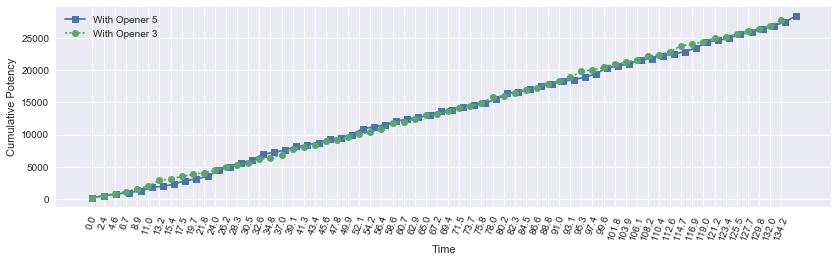

In [125]:
compare_potencies([df4_ext, df2_ext], labels=['With Opener 5', 'With Opener 3'])

Ultimately, with only weaponskills to play with, one buff, and one DoT, there is a limited degree of complexity in the single target rotation at level 50. Following the described priority system for weaponskills, using Iaijutsu intelligently, and keeping the GCD moving, you will be close to optimal output.